In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [67]:
n = 100
def gen(n):
    X = binom(3, 1/2).rvs(n)
    two_coins = X == 2
    m = np.zeros(n)
    for i in range(1,n):
        m[i] = np.mean(two_coins[:i])
    return m

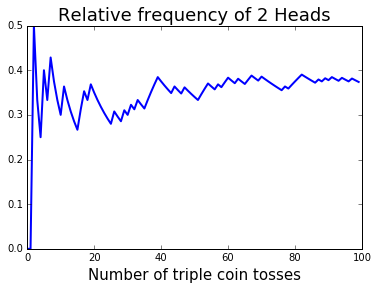

In [65]:
fig, ax = plt.subplots(1)
ax.plot(m, linewidth = 2)
ax.set_title("Relative frequency of 2 Heads", fontsize= 18)
ax.set_xlabel("Number of triple coin tosses", fontsize = 15)
fig.savefig("hw1.png")

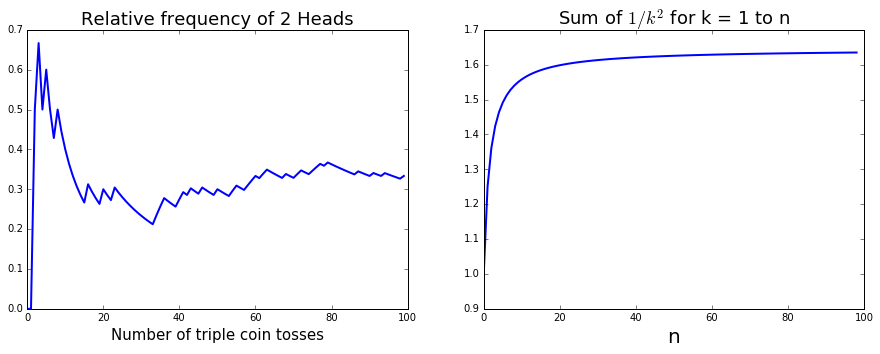

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

m = gen(n)
ax[0].plot(m, linewidth = 2)
ax[0].set_title("Relative frequency of 2 Heads", fontsize= 18)
ax[0].set_xlabel("Number of triple coin tosses", fontsize = 15)

x = np.cumsum([1/n**2 for n in range(1, 100)])
ax[1].plot(x, linewidth = 2)
ax[1].set_title("Sum of $1/k^2$ for k = 1 to n", fontsize= 18)
ax[1].set_xlabel("n", fontsize = 20)
fig.savefig("convergence1.png")

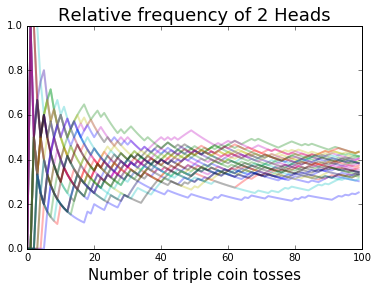

In [81]:
fig, ax = plt.subplots(1)

for i in range(30):
    m = gen(n)
    ax.plot(m, linewidth = 2, alpha = .3)

ax.set_title("Relative frequency of 2 Heads", fontsize= 18)
ax.set_xlabel("Number of triple coin tosses", fontsize = 15)
fig.savefig("convergence2.png")

In [51]:
def conv(supp, prob, n = 1):
    y = prob
    for i in range(n-1):
        y = np.convolve(y, prob)
    supp = np.arange(supp[0] + (n-1), n*supp[-1] + 1)
    return supp, y

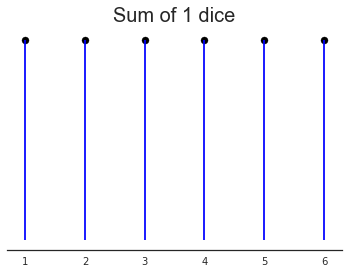

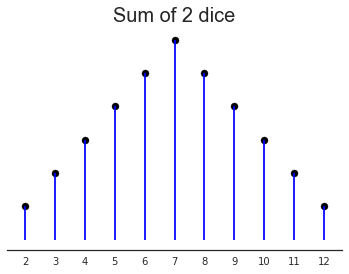

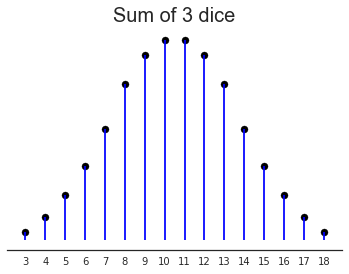

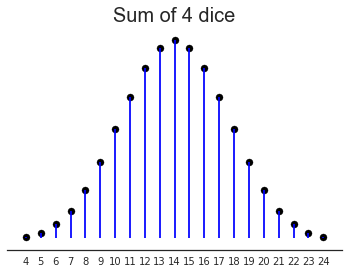

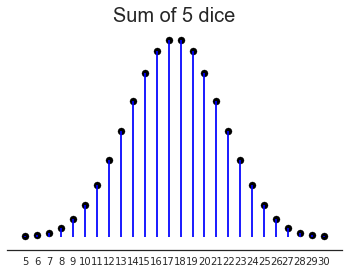

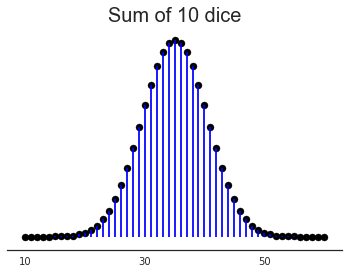

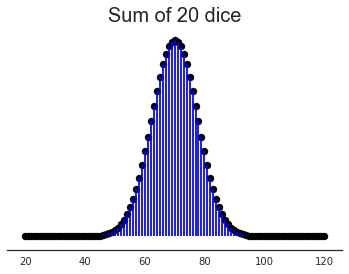

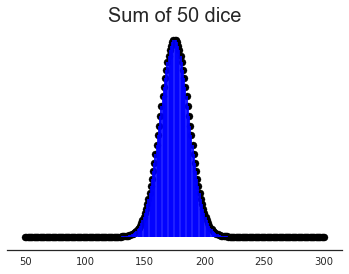

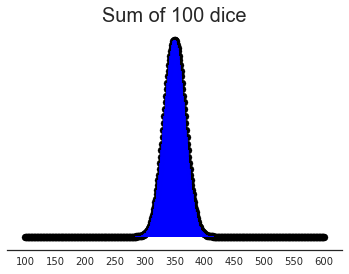

In [105]:
ns = [1, 2, 3, 4, 5, 10, 20, 50, 100]

for n in ns:
    prob = np.array([1/6]*6)
    supp = np.arange(1, 7)
    x, y = conv(supp, prob, n)
    fig, ax = plt.subplots(1)
    ax.vlines(x, 0, y, color = "blue")
    ax.scatter(x, y, s = 50, color = "black")
    if n < 10:
        ax.set_xticks(x)
    elif n < 50:
        ax.set_xticks(x[::20])
    else:
        ax.set_xticks(x[::50])
    ax.axis("tight")
    sns.despine(left = True)
    ax.set_title("Sum of %d dice" % n, fontsize = 20)
    ax.set_yticks([])
    fig.savefig("sumdice%d.png" % n)

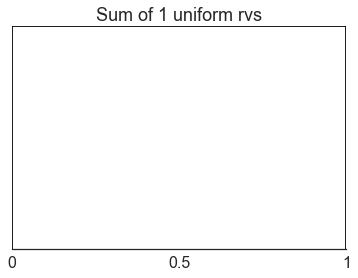

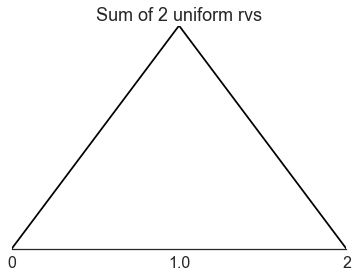

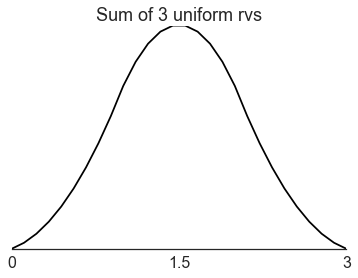

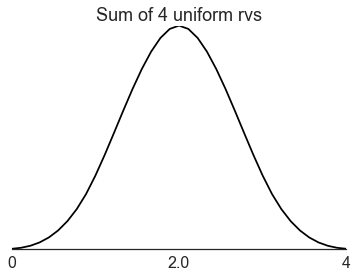

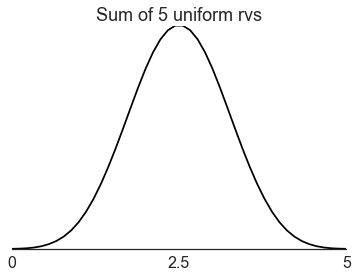

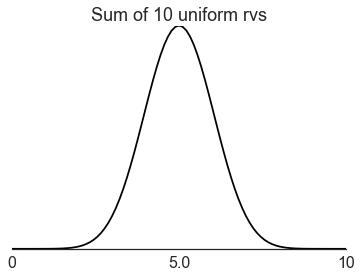

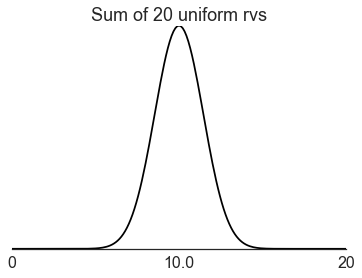

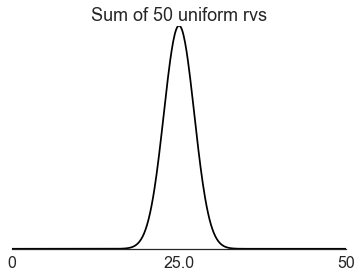

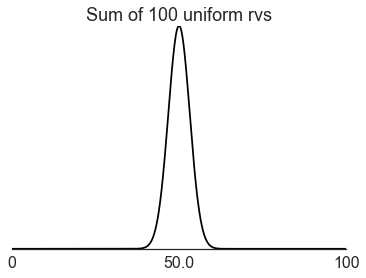

In [110]:
ns = [1, 2, 3, 4, 5, 10, 20, 50, 100]

for n in ns:
    supp = np.linspace(0, 1, 10)
    prob = ss.uniform(0, 1).pdf(supp)
    _, y = conv(supp, prob, n)
    x = np.linspace(0, n, len(y))
    fig, ax = plt.subplots(1)
    
    if n == 1:
        ax.step(x, y, color = "black")
        ax.vlines(0, 0, 1)
        ax.vlines(1, 0, 1)
    else:
        ax.plot(x, y, color = "black")
    ax.set_xticks([0, n/2, n])
    ax.set_xticklabels([0, n/2, n], fontsize = 16)
    sns.despine(left = True)
    ax.set_title("Sum of %d uniform rvs" % n, fontsize = 18)
    ax.set_yticks([])
    ax.axis("tight")
    fig.savefig("sumunif%d.png" % n)

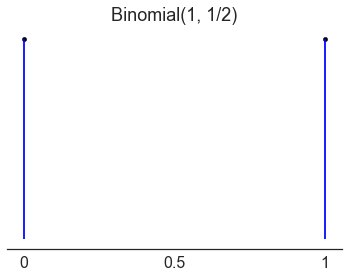

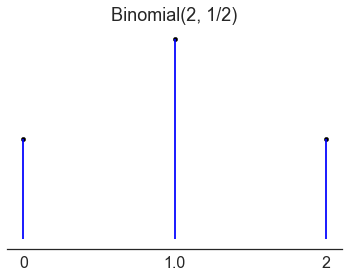

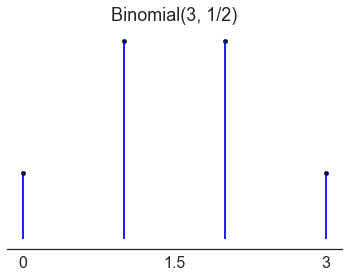

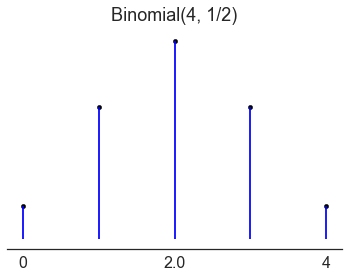

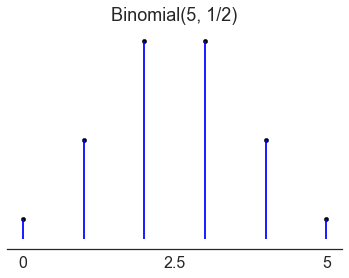

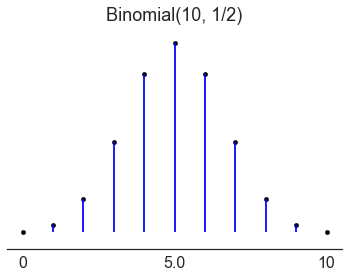

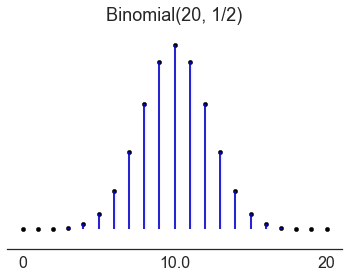

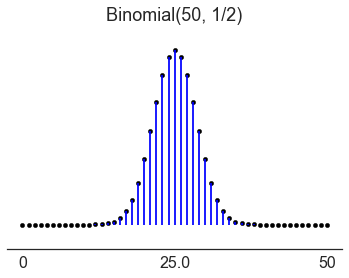

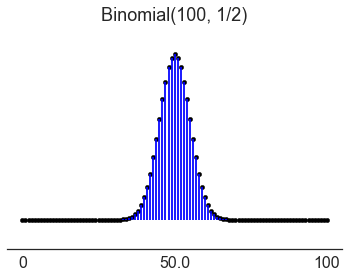

In [151]:
ns = [1, 2, 3, 4, 5, 10, 20, 50, 100]

for n in ns:
    x = np.arange(0, n+1)
    y = ss.binom(n, 1/2).pmf(x)
    fig, ax = plt.subplots(1)
    ax.scatter(x, y, color = "black")
    ax.vlines(x, 0, y, color = "blue")
    ylim = ax.get_ylim()
    ax.set_ylim([0, ylim[1]])
    ax.set_xticks([0, n/2, n])
    ax.set_xticklabels([0, n/2, n], fontsize = 16)
    sns.despine(left = True)
    ax.set_title("Binomial(%d, 1/2)" % n, fontsize = 18)
    ax.set_yticks([])
    ax.axis("tight")
    fig.savefig("sumbern%d.png" % n)

In [148]:
ss.norm(1500, np.sqrt(25*50)).cdf(1400)

0.0023388674905236331

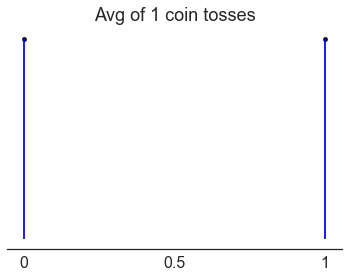

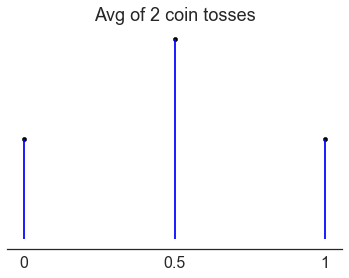

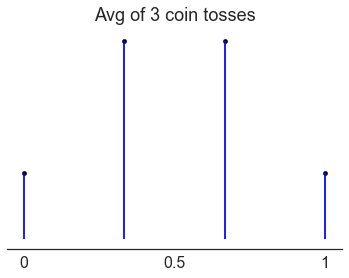

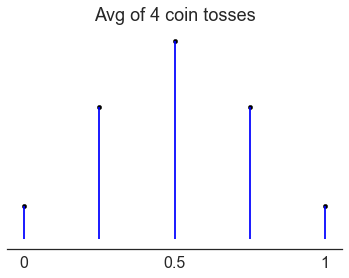

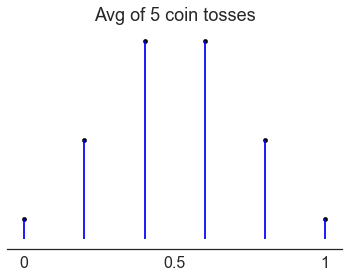

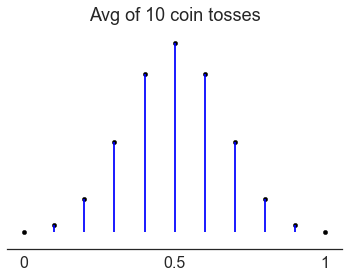

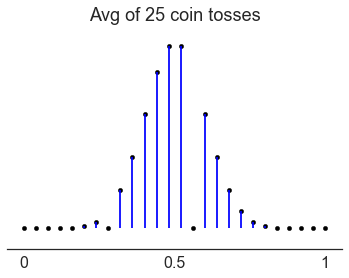

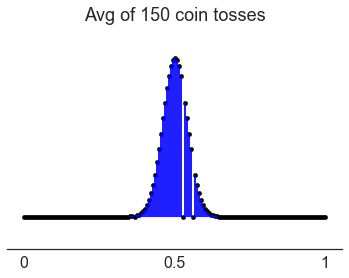

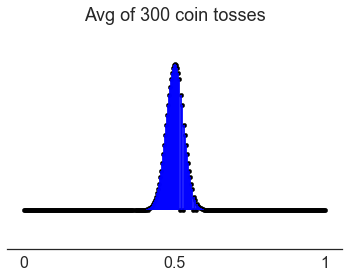

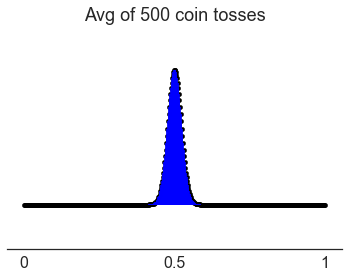

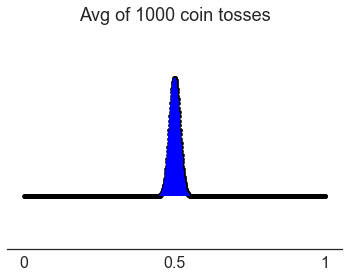

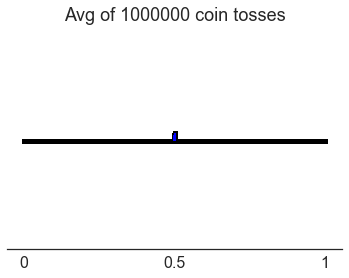

In [157]:
ns = [1, 2, 3, 4, 5, 10, 25, 150, 300, 500, 1000, 1000000]

for n in ns:
    x = np.arange(0, n+1)/n
    y = ss.binom(n, 1/2).pmf(x*n)
    fig, ax = plt.subplots(1)
    ax.scatter(x, y, color = "black")
    ax.vlines(x, 0, y, color = "blue")
    ylim = ax.get_ylim()
    ax.set_ylim([0, ylim[1]])
    ax.set_xticks([0, n/(2*n), 1])
    ax.set_xticklabels([0, n/(2*n), 1], fontsize = 16)
    sns.despine(left = True)
    ax.set_title("Avg of %d coin tosses" % n, fontsize = 18)
    ax.set_yticks([])
    ax.axis("tight")
    fig.savefig("avgbern%d.png" % n)

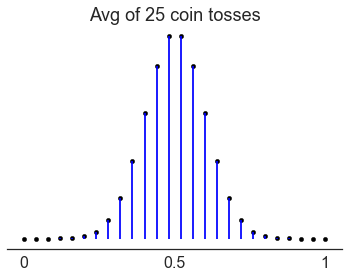

In [166]:
ns = [25]#, #100, 150, 200, 300, 500, 1000, 10000, 1000000]

for n in ns:
    x = np.arange(0, n+1)/n
    y = ss.norm(1/2, np.sqrt(1/4*(1/n))).pdf(x)
    fig, ax = plt.subplots(1)
    ax.scatter(x, 10*y, color = "black")
    ax.vlines(x, 0, 10*y, color = "blue")
    ylim = ax.get_ylim()
    ax.set_ylim([0, ylim[1]])
    ax.set_xticks([0, n/(2*n), 1])
    ax.set_xticklabels([0, n/(2*n), 1], fontsize = 16)
    sns.despine(left = True)
    ax.set_title("Avg of %d coin tosses" % n, fontsize = 18)
    ax.set_yticks([])
    ax.axis("tight")
    fig.savefig("avgbern%d.png" % n)